Exercise 1 -Discrete random varaible

1) Write the R functions for the probability density and cumulative distribution functions, using the
R naming convention

In [7]:
dPoisson <- function (k, lambda){
    return((lambda**k * exp(-lambda)) / (factorial(k)*(1 - exp(-lambda))))
}



#pPoisson <- function(k, lambda){
   # return(cumsum(dPoisson(k,lambda)))
#}

cumulative <- function(pdf){
    cdf <- c()
    y<-pdf
    for (n in (1:length(y))){
        cdf <- append(cdf,sum(y[1:n]))
    }
    return(cdf)
}

pPoisson <- function(k, lambda){
    return(cumulative(dPoisson(k,lambda)))
}



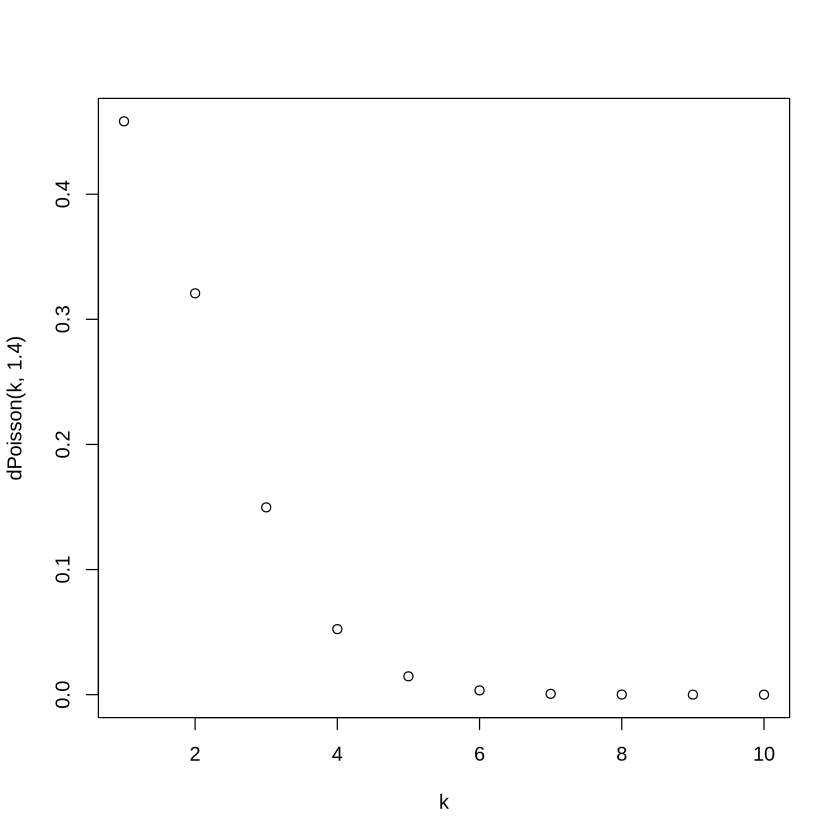

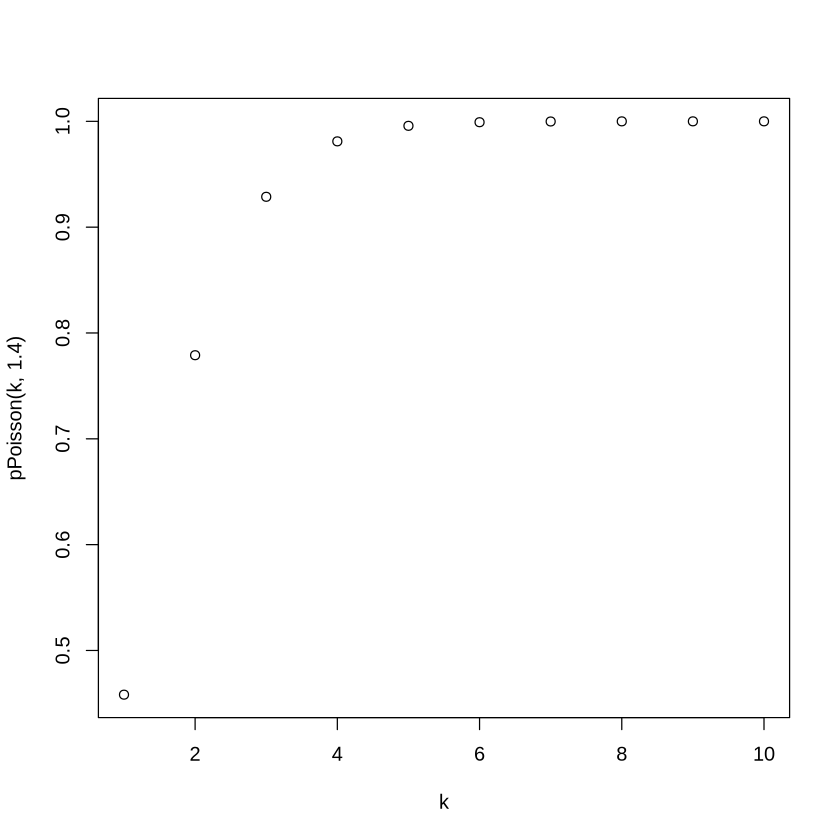

In [9]:
lambda <- 1.4
#k <- seq(0,1,by=0.01)
k <- seq(10)

plot(k,dPoisson(k,1.4))
plot(k,pPoisson(k,1.4))
#plot(k,cumulative(dPoisson(k,lambda)))

In [12]:
k_mean <- sum(k*dPoisson(k,lambda))
k_mean
mean <- ((lambda*exp(lambda))/(exp(lambda)-1))
mean

k_var <- k_mean*(1+lambda-k_mean)
k_var
var <- (sum((k**2)*dPoisson(k,lambda))-k_mean**2)
var


[1] 1.858231

[1] 1.858235

[1] 1.006732

[1] 1.006695

4) Generate a sample of random numbers from this distribution and show them in an histogram.
Evaluate the sample mean

[1] 1.96

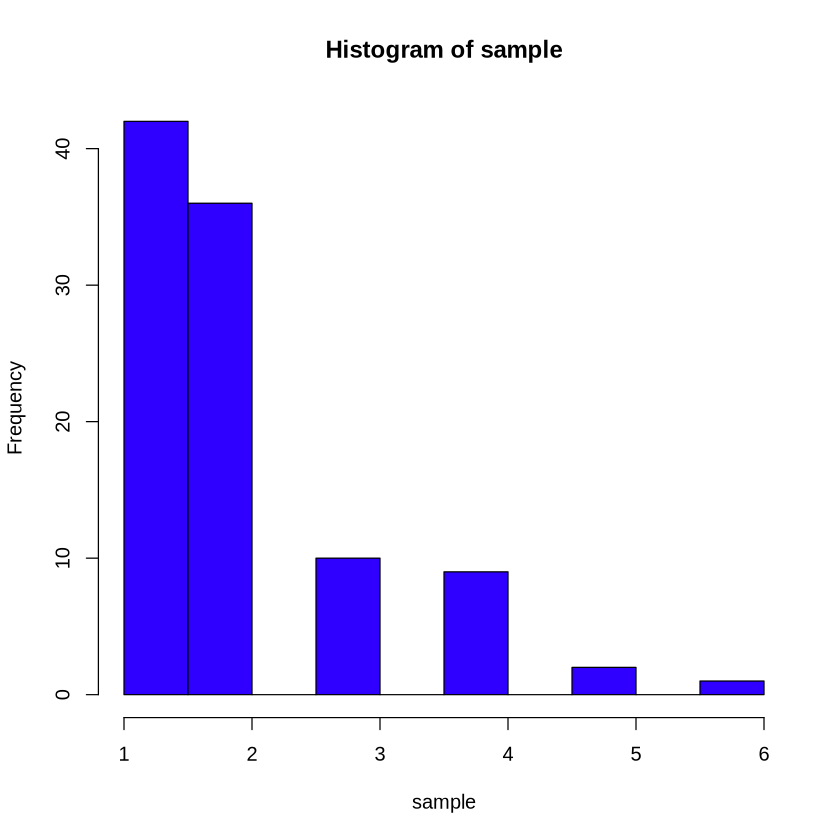

In [14]:
sample <- sample(1:10,100,replace=T,prob=dPoisson(1:10,lambda))
hist <- hist(sample,col='#2f00ff')
mean <- mean(sample)
mean

Exercise 2 - Continuos random variable

1) Compute the normalisation factor N using R.

In [31]:
E0<-7.25 #GeV
gamma <- 2.7
P_not_norm<-function(E){
    E0<-7.25 #GeV
    gamma <- 2.7
    return(ifelse(E < E0,1,(E - E0 + 1)**(-gamma)))
}

integral <- integrate(P_not_norm,lower=0,upper=Inf)
N <- 1/integral$value
N

P_muons<-function(E){
    E0<-7.25 #GeV
    gamma <- 2.7
    N <- 1/7.83823739142009
    return(ifelse(E < E0,N,N*(E - E0 + 1)**(-gamma)))
}

[1] 0.1275797

b) Plot the probability density function in R

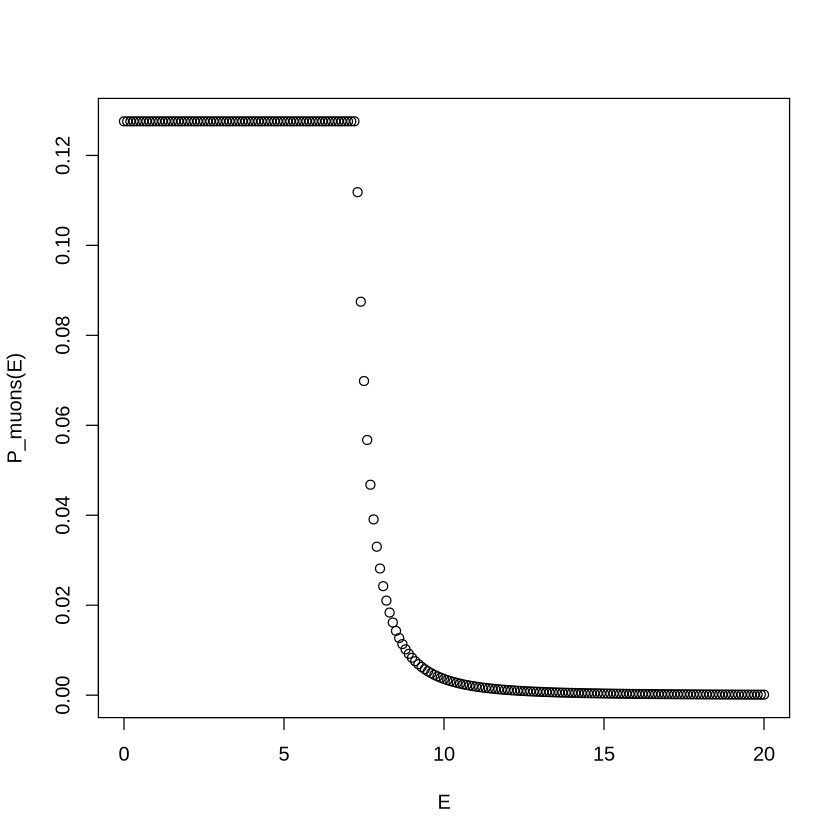

In [32]:
E<-seq(0,20,by=0.1)
plot(E,P_muons(E))

c) Plot the cumulative density function in R

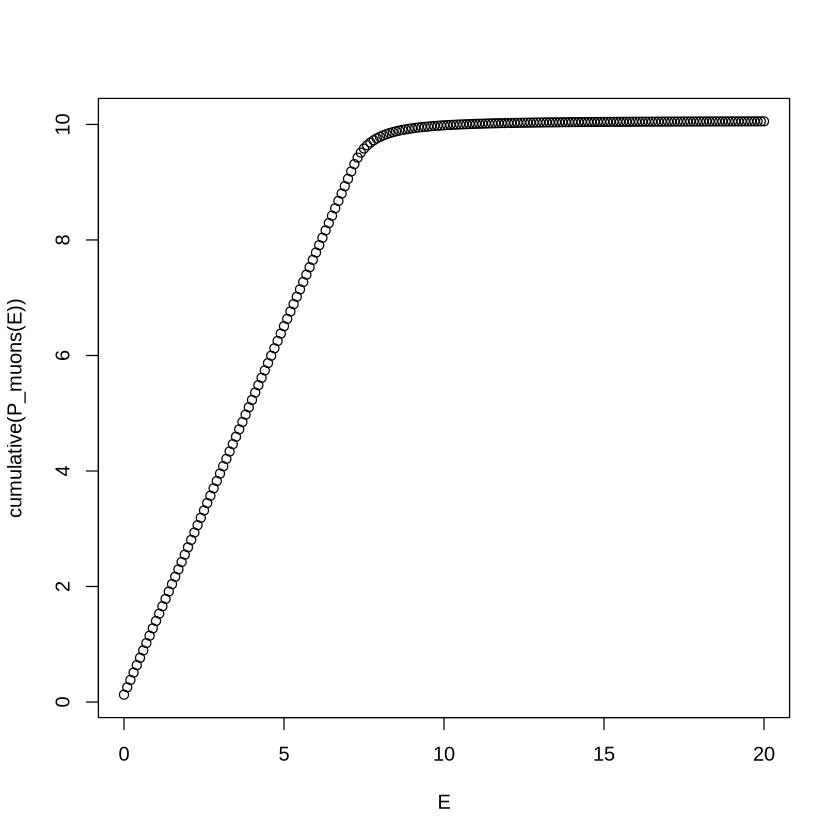

In [33]:
plot(E,cumulative(P_muons(E)))

d) Compute the mean value using R

In [34]:
fun <- function(E){
    return(E*P_muons(E))
}
E_mean <- integrate(f=fun,0,Inf)$value
E_mean

[1] 4.004251